In [1]:
# Importing important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Creating Dataframe
dataset = pd.read_csv('E-com_Data.csv')

In [3]:
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [5]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [6]:
dataset.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

# Preprocessing Data

In [7]:
# Renaming columns 
dataset = dataset.rename(columns = {'InvoieNo': 'InvoiceNo', 
                                    'Date of purchase':'Date'})

In [8]:
# Finding % of data missing in each column
print(dataset.isnull().sum()/len(dataset)*100)

CustomerID            25.304556
Item Code              0.579728
InvoiceNo              0.579728
Date                   0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64


In [9]:
# Total Duplicates in Dataframe
dataset.duplicated().sum()

3145

In [10]:
# Droppping Duplicate rows
dataset = dataset.drop_duplicates(ignore_index = True)

In [11]:
#missing customerid - we have to drop now
dataset = dataset.dropna(subset = ['CustomerID'])

In [12]:
#Converting Date column into Date type
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [13]:
#creating one more date so we can do calculation on that column without interfering with original column
dataset['Date1'] = dataset['Date']

In [14]:
dataset['Date1'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date1, dtype: object

# Applying RFM approach

In [15]:
# Recency = latest date - last invoice date
# Frequency = Count of invoice no of transaction(s) 
# Monetary = Sum of total Price

import datetime as dt
latest_date = dt.datetime(2017,12,20)

RFMScores = dataset.groupby('CustomerID').agg({'Date1': 
                                             lambda x: (latest_date - x.max()).days,
                                              'Date': lambda x: x.nunique(),
                                              'Price' : lambda x: x.sum()})

# Convert date into int because we want to count the date column
RFMScores['Date'] = RFMScores['Date'].astype(int)

# Rename columns names as Recency, Frequency and Monetary
RFMScores.rename(columns = {'Date1': 'Recency', 'Date' : 'Frequency',
                           'Price': 'Monetary'}, inplace=True)

RFMScores.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,20,10,176613.0
3,5.0,18,7,41976.0
4,6.0,9,42,151822.0
5,7.0,208,4,9410.0
6,8.0,234,10,135550.0
7,9.0,15,7,65832.0
8,10.0,16,22,331601.0
9,11.0,9,10,771439.0


# Descriptive anaytics

In [16]:
RFMScores.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

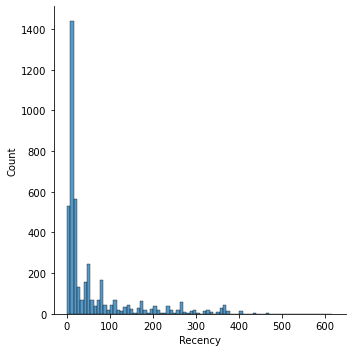

In [17]:
sns.displot(RFMScores['Recency'])

In [18]:
RFMScores.Frequency.describe()

count    4349.000000
mean       27.396643
std        33.594882
min         1.000000
25%         9.000000
50%        16.000000
75%        33.000000
max       378.000000
Name: Frequency, dtype: float64

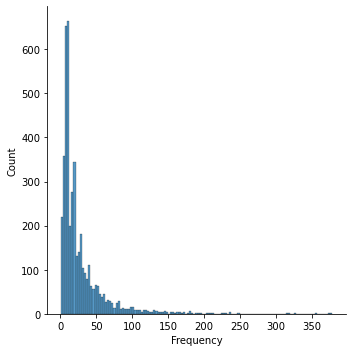

In [19]:
sns.displot(RFMScores['Frequency'])

In [20]:
RFMScores.Monetary.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetary, dtype: float64

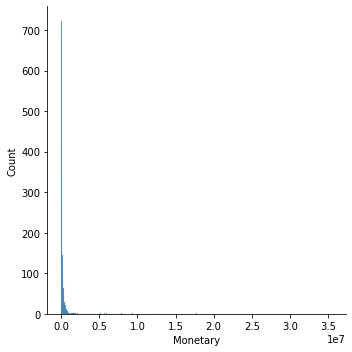

In [21]:
sns.displot(RFMScores['Monetary'])

In [22]:
# Spliting the data into 4 segment on the basis of quantile

quantils = RFMScores.quantile(q=[0.25, 0.5, 0.75])
qunatils = quantils.to_dict()
qunatils

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [23]:
# Funtions to create R, F and M segment 
# parameters: quantil = q, p = Recency/Frequency/Monetary
def Rscores(x,p,q):
    if x <= q[p][0.25]:
        return 1
    if x <= q[p][0.50]:
        return 2
    if x <= q[p][0.75]:
        return 3
    else:
        return 4
    
def F_or_M_scores(x,p,q):
    if x <= q[p][0.25]:
        return 4
    if x <= q[p][0.50]:
        return 3
    if x <= q[p][0.75]:
        return 2
    else:
        return 1


In [24]:
RFMScores['R'] = RFMScores['Recency'].apply(Rscores, args = ('Recency', quantils))
RFMScores['F'] = RFMScores['Frequency'].apply(F_or_M_scores, args = ('Frequency', quantils))
RFMScores['M'] = RFMScores['Monetary'].apply(F_or_M_scores, args = ('Monetary', quantils))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,4,2,1
4.0,20,10,176613.0,3,3,2
5.0,18,7,41976.0,2,4,3
6.0,9,42,151822.0,1,1,2


In [25]:
#Creating 2 new columns RFMGroup and RFMScore
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis =1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3
3.0,77,18,257404.0,4,2,1,421,7
4.0,20,10,176613.0,3,3,2,332,8
5.0,18,7,41976.0,2,4,3,243,9
6.0,9,42,151822.0,1,1,2,112,4


In [26]:
# Creating a new column Loyalty_level
Loyalty_level = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cuts = pd.qcut(RFMScores['RFMScore'], q=4, labels = Loyalty_level)
RFMScores['RFMLoyalty_level'] = score_cuts.values
RFMScores.reset_index().head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFMLoyalty_level
0,2.0,4,63,553704.0,1,1,1,111,3,Platinum
1,3.0,77,18,257404.0,4,2,1,421,7,Gold
2,4.0,20,10,176613.0,3,3,2,332,8,Gold
3,5.0,18,7,41976.0,2,4,3,243,9,Silver
4,6.0,9,42,151822.0,1,1,2,112,4,Platinum
5,7.0,208,4,9410.0,4,4,4,444,12,Bronze
6,8.0,234,10,135550.0,4,3,2,432,9,Silver
7,9.0,15,7,65832.0,2,4,3,243,9,Silver
8,10.0,16,22,331601.0,2,2,1,221,5,Platinum
9,11.0,9,10,771439.0,1,3,1,131,5,Platinum


In [27]:
#Filter RFMGroup column  = 111
RFMScores[RFMScores['RFMGroup']== '111'].sort_values('Monetary', ascending =False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFMLoyalty_level
0,1704.0,3,235,35536194.0,1,1,1,111,3,Platinum
1,1896.0,2,356,17743855.0,1,1,1,111,3,Platinum
2,56.0,10,108,14357682.0,1,1,1,111,3,Platinum
3,1346.0,9,237,12647317.0,1,1,1,111,3,Platinum
4,3802.0,3,236,12319439.0,1,1,1,111,3,Platinum
5,4234.0,3,94,10654918.0,1,1,1,111,3,Platinum
6,1006.0,5,211,9351019.0,1,1,1,111,3,Platinum
7,3203.0,5,99,8102167.0,1,1,1,111,3,Platinum
8,2193.0,1,357,7966054.0,1,1,1,111,3,Platinum
9,1448.0,5,190,7892625.0,1,1,1,111,3,Platinum


In [28]:
RFMScores = RFMScores.reset_index()

In [29]:
RFMScores1 = RFMScores.iloc[:,0:4]
RFMScores1

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,20,10,176613.0
3,5.0,18,7,41976.0
4,6.0,9,42,151822.0
...,...,...,...,...
4344,4368.0,17,7,20480.0
4345,4369.0,181,6,10774.0
4346,4370.0,12,11,24962.0
4347,4371.0,4,132,280608.0


In [30]:
# Feature scaling - Data standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
RFMScores1 = scaler.fit_transform(RFMScores1)

# Implementing K-means cluster model

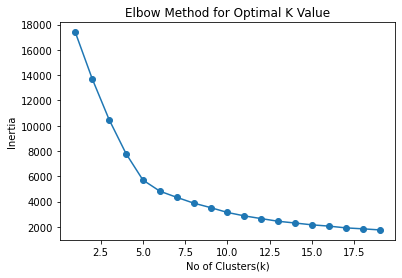

In [31]:
from sklearn.cluster import KMeans
#interia = sum of square of distance from each point to the centroid
inertias = []

for k in range(1,20):
    km = KMeans(n_clusters = k)
    km = km.fit(RFMScores1)
    inertias.append(km.inertia_)

plt.plot(range(1,20), inertias, marker='o')
plt.xlabel("No of Clusters(k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K Value")
plt.show()

In [32]:
KMeans_cluster = KMeans(n_clusters = 6, init='k-means++', max_iter=500)
KMeans_cluster.fit(RFMScores1)

KMeans(max_iter=500, n_clusters=6)

In [33]:
RFMScores['Cluster'] = KMeans_cluster.labels_
RFMScores.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFMLoyalty_level,Cluster
0,2.0,4,63,553704.0,1,1,1,111,3,Platinum,1
1,3.0,77,18,257404.0,4,2,1,421,7,Gold,1
2,4.0,20,10,176613.0,3,3,2,332,8,Gold,1
3,5.0,18,7,41976.0,2,4,3,243,9,Silver,1
4,6.0,9,42,151822.0,1,1,2,112,4,Platinum,1
5,7.0,208,4,9410.0,4,4,4,444,12,Bronze,0
6,8.0,234,10,135550.0,4,3,2,432,9,Silver,0
7,9.0,15,7,65832.0,2,4,3,243,9,Silver,1
8,10.0,16,22,331601.0,2,2,1,221,5,Platinum,1
9,11.0,9,10,771439.0,1,3,1,131,5,Platinum,1


In [38]:
# Saving the DataFrame as new csv file with name new_clustered_data:
RFMScores.to_csv('New_Clustered_data.csv')